In [1]:
# Installing pyFTS
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-g5j04o2h
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-g5j04o2h
  Created wheel for pyFTS: filename=pyFTS-1.6-py3-none-any.whl size=217208 sha256=ab70757ec0a5622d285d73742e3fd341e0a415289f32cf3ac5fce5da3c553079
  Stored in directory: /tmp/pip-ephem-wheel-cache-rrmkzhqm/wheels/30/23/2b/2e10c811e284f08e37b5f6d6320e78bade4dd580081288f61a
Successfully built pyFTS


In [2]:
# Installing necessary libs
import matplotlib.pylab as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# Reading main csv
df = pd.read_csv('train.csv')


In [4]:
# Filtering the df to focus on a specific cut of the main data
target_df = df[(df.store==2) & (df.item==2)]
target_df.date=target_df.date.str[0:4]
target_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,store,item,sales
20086,2013,2,2,41
20087,2013,2,2,33
20088,2013,2,2,46
20089,2013,2,2,50
20090,2013,2,2,44
...,...,...,...,...
21907,2017,2,2,74
21908,2017,2,2,69
21909,2017,2,2,56
21910,2017,2,2,74


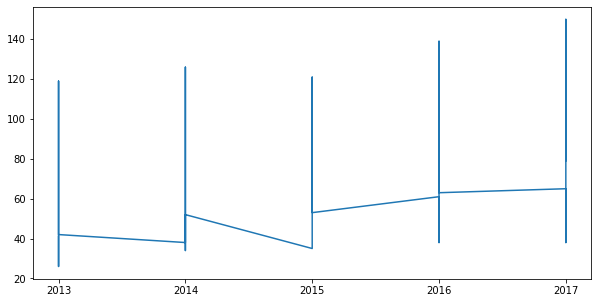

In [5]:
# Visualizing our time series on a plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])
plot(target_df['date'],target_df['sales'])


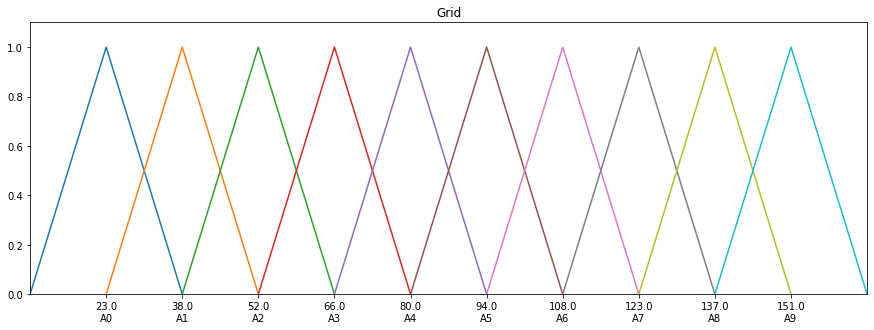

In [6]:
# Split partitions of data to create fuzzy sets

from pyFTS.partitioners import Grid
sales=target_df.sales.to_numpy()
fs = Grid.GridPartitioner(data=sales,npart=10)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fs.plot(ax)



In [7]:
# Fuzzification

fuzzyfied = fs.fuzzyfy(sales, method='maximum', mode='sets')


In [8]:
# Temporal patterns

from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)


In [9]:
# Rules generation
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(sales)

/usr/local/lib/python3.7/dist-packages/pyFTS/common/transformations/trend.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


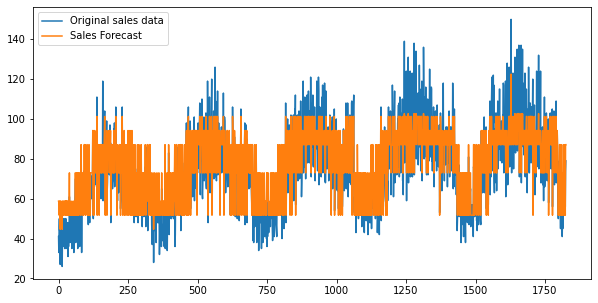

In [10]:
# Forecasting and plotting

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

forecasts = model.predict(sales)

orig, = plot(sales, label="Original sales data")
pred, = plot(forecasts, label="Sales Forecast")

legend(handles=[orig, pred])